# Exercício 1

Faça um estudo de simulação representando o teste de hipóteses para a proporção de uma população desenvolvido na videoaula. Tente pensar o que significa o procedimento de decisão do teste e faça uma simulação em Python para representá-lo numericamente.

[0 1]
[188 191]


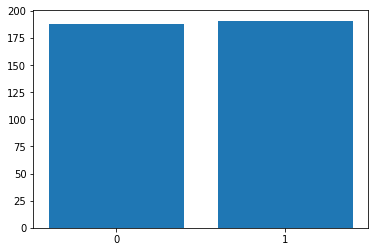

In [5]:
# Vamos supor que a proporção de homens com pelo menos 60% de tentativas de relação sexual bem sucedidas seja 0,5.
# Ou seja, H0 é verdadeira.
# Assim, X~Bernoulli e H0: p = 0,5 (verdadeira)

# Vamos simular o resultado da variável X (pelo menos 60% de tentativas de relação sexual bem sucedidas) 
# para n = 379 homens (o tamanho de nossa amostra).
# Vamos usar a função bernoulli.rvs de scipy.stats

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# simulando uma amostra - note que a cada vez que executamos, obtemos uma amostra diferente
p = 0.5
n = 379
r = stats.bernoulli.rvs(p, size=n)

# visualização da amostra
values, counts = np.unique(r, return_counts=True)
print(values)
print(counts)
positions = (0, 1)
labels = ("0", "1")
plt.xticks(positions, labels)
plt.bar(values, counts)
plt.show()

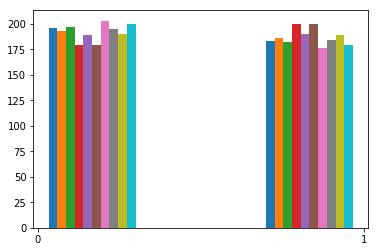

In [6]:
# Vamos repetir a simulação da amostra 10 vezes 
#(apenas para ilustrar o que faremos no próximo passo, com bem mais repetições)

p = 0.5
n = 379

amostras = []
for i in range(10):
    r = stats.bernoulli.rvs(p, size=n)
    amostras.append(r)
    
values, counts = np.unique(amostras, return_counts=True)
positions = (0, 1)
labels = ("0", "1")
plt.xticks(positions, labels)
plt.hist(amostras, bins = 3)
plt.show()

In [10]:
# Vamos repetir a simulação da amostra 10 mil vezes

# podemos usar a função np.random.binomial para fazer isso, pois os indivíduos são independentes uns dos outros
#generate random values
#n = number of trials
#p = probability of occurrence
#size = number of experiments
x = np.random.binomial(n=379, p = 0.5, size = 10000)

#Em cada um dos 10 mil trials, conta quantos homens (dos 379) tiveram pelo menos 60% de tentativas bem sucedidas
# Counts é o número de trials com "values" homens com pelo menos 60% de tentativas bem sucedidas
values, counts = np.unique(x, return_counts=True)
np.unique(x, return_counts=True)

(array([151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
        179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
        192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
        205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
        218, 219, 220, 221, 223, 224, 231]),
 array([  1,   1,   1,   1,   1,   1,   1,   2,   5,   8,  10,   8,  12,
         19,  38,  32,  59,  57,  54,  71, 102, 107, 158, 157, 196, 195,
        228, 245, 264, 310, 296, 384, 346, 402, 392, 407, 415, 436, 390,
        381, 369, 381, 342, 300, 309, 299, 263, 223, 215, 177, 158, 134,
        128,  99,  75,  77,  53,  52,  40,  33,  19,  17,  10,   8,   5,
          5,   4,   4,   4,   2,   1,   1], dtype=int64))

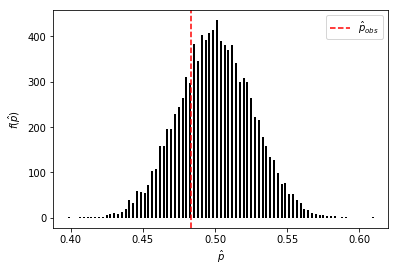

In [11]:
# vamos comparar com a proporção observada no exemplo da aula
estat = 0.483

plt.vlines(values/379, 0, counts, lw=2)
plt.axvline(x = estat, color = "red", linestyle = "--", label = r'$\hat{p}_{obs}$')
plt.xlabel("$\hat{p}$")
plt.ylabel("$f(\hat{p})$")
plt.legend();

In [16]:
# Conta o número de trials em que a proporção de homens com pelo menos 60% tentativas bem sucedidas é menor ou igual ao observado na amostra
# Na amostra, foram 0,483, que vezes 379, dá 183 homens
sum(i <= 183  for i in x)

2640

In [19]:
# Representando em % de trials, dá:
pvalor = sum(i <= 183  for i in x)/10000
print("Este representa o p-valor na nossa simulação: ",pvalor)

Este representa o p-valor na nossa simulação:  0.264


# Exercício 2

Use a função spicy.stats.levene em Python e teste a hipótese das variâncias da variável média no ENEM das escolas serem iguais nas administrações públicas e privadas

In [22]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv("ENEM.csv", sep = ';', na_values = '-', encoding= 'unicode_escape')

# Generate some data for this demonstration.
data1 = df.loc[df.Admin=='Privada', "Média"]
data2 = df.loc[df.Admin=='Estadual', "Média"]


print("A variância das médias das escolas privadas é %.2f" % (np.std(data1)**2))
print("A variância das médias das escolas públicas é %.2f" % (np.std(data2)**2))

A variância das médias das escolas privadas é 859.26
A variância das médias das escolas públicas é 944.19


In [9]:
# Teste de Levene para igualdade de variâncias
stats.levene(data1,data2)

#Ao considerar alpha=0.05 a Hipótese Nula H0 (igualdade de variâncias) não pode ser rejeitada, 
#pois o valor p é maior que alpha

# Mas note que se considerarmos um alpha=0.10, a hipótese nula é rejeitada e concluimos
# que as variâncias não são iguais

LeveneResult(statistic=2.708418054166318, pvalue=0.09992833645553564)

# Exercício 3

Considerando o resultado do exercício 2, teste a hipótese das médias da variável média no ENEM das escolas serem iguais nas administrações públicas e privadas.

In [13]:
# Teste t de Student (bicaudal) para média de duas populações Normais com variâncias iguais
stats.ttest_ind(data1,data2)

#Ao considerar alpha=0.05 a Hipótese Nula H0 (igualdade de médias) pode ser rejeitada, 
#pois o valor p é menor que alpha

Ttest_indResult(statistic=42.56684851895187, pvalue=5.4681180107221735e-308)